# Trabalho Final de INF420

## Import das bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, SpatialDropout1D, Flatten,GRU
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## Pré-processamento 1

In [2]:
df = pd.read_csv('databases/db.csv', sep=';', header=None)

df = df.drop(columns=df.columns[4:])  # Remove colunas da 5ª em diante
df = df.drop(df.index[:1])  # Remove a primeira linha

df.columns = ['Music', 'Artist', 'Genra', 'Lyrics']

df['Genra'].value_counts()


C:\Users\guinu\AppData\Local\Temp\ipykernel_24340\2812351294.py:1: DtypeWarning: Columns (38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,

Genra
pop        830
rock       790
Hip-Hop    720
Name: count, dtype: int64

In [3]:
# Remover linhas onde a coluna 'Genra' é 'pop'
df = df[df['Genra'] != 'pop']

classes = len(df['Genra'].value_counts())

## Pré-processamento 2

In [4]:
df['Words'] = df['Lyrics'].str.split()
df['Diferent_words'] = df['Words'].str.len()
df.dropna(inplace=True)

df.head()

,Music,Artist,Genra,Lyrics,Words,Diferent_words
1,Enter Sandman,Metallica,rock,"Say your prayers, little one, don't forget, ...","[Say, your, prayers,, little, one,, don't, for...",261.0
2,Whiskey In The Jar,Metallica,rock,As I was going over the Cork and Kerry mountai...,"[As, I, was, going, over, the, Cork, and, Kerr...",316.0
3,Master Of Puppets,Metallica,rock,"End of passion play, crumbling away I'm your s...","[End, of, passion, play,, crumbling, away, I'm...",364.0
4,Fuel,Metallica,rock,"Give me fuel, give me fire Give me that which ...","[Give, me, fuel,, give, me, fire, Give, me, th...",251.0
5,Nothing Else Matters,Metallica,rock,"[Refrain] So close, no matter how far Couldn'...","[[Refrain], So, close,, no, matter, how, far, ...",245.0


In [5]:
MAX_WORDS = 2500
MAX_SEQUENCE_LENGTH = 355
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df.Lyrics.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df.Lyrics.values)

<>:5: SyntaxWarning: invalid escape sequence '\]'
<>:5: SyntaxWarning: invalid escape sequence '\]'
C:\Users\guinu\AppData\Local\Temp\ipykernel_24340\1869848098.py:5: SyntaxWarning: invalid escape sequence '\]'
  tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')


In [6]:
df.Lyrics.values[0]
X[0]
tokenizer.word_index

{'the': 1,
 'i': 2,
 'you': 3,
 'a': 4,
 'to': 5,
 'and': 6,
 'me': 7,
 'it': 8,
 'my': 9,
 'in': 10,
 'feat': 11,
 'on': 12,
 "i'm": 13,
 'like': 14,
 'of': 15,
 'that': 16,
 'your': 17,
 'yeah': 18,
 'for': 19,
 'all': 20,
 'is': 21,
 'with': 22,
 "don't": 23,
 'up': 24,
 'love': 25,
 'we': 26,
 'got': 27,
 'be': 28,
 'know': 29,
 'get': 30,
 'no': 31,
 'so': 32,
 'oh': 33,
 'this': 34,
 'but': 35,
 'what': 36,
 "it's": 37,
 'just': 38,
 'they': 39,
 'now': 40,
 'when': 41,
 'do': 42,
 'out': 43,
 'she': 44,
 'can': 45,
 'see': 46,
 'one': 47,
 'if': 48,
 'down': 49,
 "ain't": 50,
 'chorus': 51,
 'go': 52,
 'as': 53,
 'was': 54,
 'might': 55,
 'baby': 56,
 '1': 57,
 'from': 58,
 'g': 59,
 'never': 60,
 'back': 61,
 'at': 62,
 'nigga': 63,
 'by': 64,
 'come': 65,
 '2': 66,
 'also': 67,
 'b': 68,
 'time': 69,
 "can't": 70,
 'her': 71,
 'remaster': 72,
 'want': 73,
 'niggas': 74,
 'shit': 75,
 'he': 76,
 'take': 77,
 'verse': 78,
 'wanna': 79,
 "'cause": 80,
 'ooh': 81,
 'fuck': 82,
 'h

In [7]:
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
Y = pd.get_dummies(df['Genra']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [8]:
# model = load_model('bm.keras')
# print("Modelo carregado com sucesso!")

In [9]:
# model = Sequential()
# model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
# model.add(SpatialDropout1D(0.3))
# model.add(GRU(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))  # 1ª camada GRU
# model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))  # 2ª camada GRU
# model.add(Dense(128, activation='relu'))  # Aumentando o número de neurônios
# model.add(Dropout(0.4))  # Aumentando o dropout
# model.add(Dense(classes, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 5
batch_size = 64

# history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

try:
    model = load_model('gru-best_model.keras')
    print("Modelo carregado com sucesso!")
except:
    # Se o modelo não existir, cria um novo
    print("Modelo não encontrado, criando um novo modelo...")
    model = Sequential()
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(classes, activation='softmax'))

optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Definir callbacks
checkpoint_callback = ModelCheckpoint(filepath='gru-best_model.keras', save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks_list = [checkpoint_callback, early_stopping_callback, reduce_lr_callback]

# Treinar o modelo
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=callbacks_list)

Modelo não encontrado, criando um novo modelo...
Epoch 1/5


c:\Users\guinu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step - accuracy: 0.5680 - loss: 0.6876
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 432ms/step - accuracy: 0.6520 - loss: 115637774710487618945024.0000
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 426ms/step - accuracy: 0.4648 - loss: nan
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 440ms/step - accuracy: 0.4621 - loss: nan
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 430ms/step - accuracy: 0.4768 - loss: nan


KeyError: 'val_accuracy'

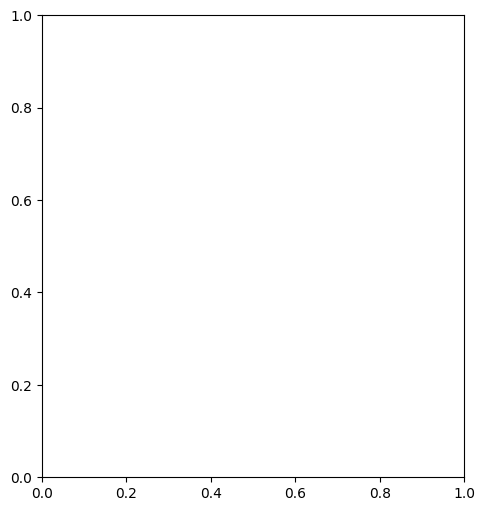

In [10]:
# Supondo que 'history' seja o resultado do treino do modelo
plt.figure(figsize=(12, 6))

# Subplot 1: Validation Accuracy por época
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Validation and Train Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Validation Loss por época
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Validation and Train Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
X_test=["There's a lady who's sure All that glitters is gold And she's buying a stairway to heaven When she gets there, she knows If the stores are all closed With a word she can get what she came for Ooh-ooh-ooh Ooh-ooh-ooh-ooh-ooh And she's buying a stairway to heaven There's a sign on the wall But she wants to be sure 'Cause you know sometimes words have two meanings In a tree by the brook There's a songbird who sings Sometimes all of our thoughts are misgiven Ooh, it makes me wonder Ooh, makes me wonder There's a feeling I get When I look to the west And my spirit is crying for leaving In my thoughts, I have seen Rings of smoke through the trees And the voices of those who stand looking Ooh, makes me wonder Ooh, really makes me wonder And it's whispered that soon If we all call the tune Then the piper will lead us to reason And a new day will dawn For those who stand long And the forests will echo with laughter Oh, whoa, whoa, whoa, whoa, oh If there's a bustle in your hedgerow Don't be alarmed now It's just a spring-clean for the May Queen Yes, there are two paths you can go by But in the long run There's still time to change the road you're on And it makes me wonder Oh, whoa, whoa, oh Your head is humming and it won't go In case you don't know The piper's calling you to join him Dear lady, can you hear the wind blow? And did you know Your stairway lies on the whispering wind? And as we wind on down the road Our shadows taller than our soul There walks a lady we all know Who shines white light and wants to show How everything still turns to gold And if you listen very hard The tune will come to you, at last When all are one and one is all, yeah To be a rock and not to roll And she's buying a stairway to heaven",
        "Just waking up in the morning, gotta thank God I don't know, but today seems kinda odd No barking from the dogs, no smog And momma cooked the breakfast with no hog I got my grub on, but didn't pig out Finally, got a call from a girl I wanna dig out Hooked it up on later as I hit the do' Thinking: Will I live another twenty-fo'? I gotta go 'cause I got me a drop top And if I hit the switch, I can make the ass drop Had to stop at a red light Looking in my mirror, not a jacker in sight And everything is alright I got a beep from Kim and she can fuck all night Called up the homies, and I'm askin' y'all Which park are y'all playin' basketball? Get me on the court and I'm trouble Last week fucked around and got a triple double Freaking niggas every way, like MJ I can't believe, today was a good day (shit!) Drove to the pad and hit the showers Didn't even get no static from the cowards 'Cause just yesterday them fools tried to blast me Saw the police and they rolled right past me No flexin', didn't even look in a niggas direction As I ran the intersection Went to Short Dog's house, they was watchin' Yo! MTV Raps What's the haps on the craps Shake em up, shake em up, shake em up, shake em Roll em in a circle of niggas and watch me break em With the seven, seven-eleven, seven-eleven Seven even back do' Little Joe I picked up the cash flow Then we played bones, and I'm yellin' domino Plus nobody I know got killed in South Central L.A. Today was a good day (shit!) Left my niggas' house paid Picked up a girl been tryin' to fuck since the twelve grade It's ironic, I had the booze she had the chronic The Lakers beat the Supersonics I felt on the big fat fanny Pulled out the jammy, and killed the poor nanny And my dick runs deep, so deep, so deep Put her ass to sleep Woke her up around one She didn't hesitate, to call Ice Cube the top gun Drove her to the pad and I'm coasting Took another sip of the potion, hit the three-wheel motion I was glad everything had worked out Dropped her ass off, then I chirped out Today was like one of those fly dreams Didn't even see a berry flashing those high beams No helicopter looking for a murder Two in the morning got the fat burger Even saw the lights of the Goodyear Blimp And it read Ice Cube's a pimp Drunk as hell but no throwing up Halfway home and my pager still blowing up Today I didn't even have to use my AK I got to say it was a good day (shit!) Hey, wait, wait a minute, fool Stop this shit What the fuck am I thinking about?",
          "Pss, I see dead people (Mustard on the beat, ho) Ayy, Mustard on the beat, ho Deebo, any rap nigga, he a free throw Man down, call an amberlamps, tell him: Breathe, bro Nail a nigga to the cross, he walk around like Teezo What's up with these jabroni-ass niggas tryna see Compton? The industry can hate me, fuck 'em all and they mama How many opps you really got? I mean, it's too many options I'm finna pass on this body, I'm John Stockton Beat your ass and hide the Bible if God watchin' Sometimes you gotta pop out and show niggas Certified boogeyman, I'm the one that up the score with 'em Walk him down, whole time I know he got some ho in him Pole on him, extort shit, bully, Death Row on him Say, Drake, I hear you like 'em young You better not ever go to cell block one To any bitch that talk to him and they in love Just make sure you hide your lil' sister from him They tell me Chubbs the only one that get your hand-me-downs And PARTY at the party playin' with his nose now And Baka got a weird case, why is he around? Certified Lover Boy? Certified pedophiles Wop, wop, wop, wop, wop, Dot, fuck 'em up Wop, wop, wop, wop, wop, I'ma do my stuff Why you trollin' like a bitch? Ain't you tired? Tryna strike a chord and it's probably A-Minor They not like us They not like us They not like us They not like us They not like us They not like us You think the Bay gon' let you disrespect Pac, nigga? I think that Oakland show gon' be your last stop, nigga Did Cole fouI, I don't know why you still pretendin' What is the owl? Bird niggas and bird bitches, go The audience not dumb Shape the stories how you want, hey, Drake, they're not slow Rabbit hole is still deep, I can go further, I promise Ain't that somethin'? B-Rad stands for bitch and you Malibu most wanted Ain't no law, boy, you ballboy, fetch Gatorade or somethin' Since 2009 I had this bitch jumpin' You niggas'll get a wedgie, be flipped over your boxers What OVO for? The Other Vaginal Option? Pussy Nigga better straighten they posture, got famous all up in Compton Might write this for the doctorate, tell the pop star: Quit hidin' Fuck a caption, want action, no accident and I'm hands-on, he fuck around, get polished Fucked on Wayne girl while he was in jail, that's connivin' Then get his face tatted like a bitch apologizin' I'm glad DeRoz' came home, y'all didn't deserve him neither From Alondra down to Central, nigga better not speak on Serena And your homeboy need subpoena, that predator move in flocks That name gotta be registered and placed on neighborhood watch I lean on you niggas like another line of Wock' Yeah, it's all eyes on me and I'ma send it up to Pac, ayy Put the wrong label on me, I'ma get 'em dropped, ayy Sweet Chin Music and I won't pass the aux, ayy How many stocks do I really have in stock? Ayy One, two, three, four, five, plus five, ayy Devil is a lie, he a 69 God, ayy Freaky-ass niggas need to stay they ass inside, ayy Roll they ass up like a fresh pack of 'za, ayy City is back up, it's a must, we outside, ayy They not like us They not like us They not like us They not like us They not like us They not like us Once upon a time, all of us was in chains Homie still doubled down callin' us some slaves Atlanta was the Mecca, buildin' railroads and trains Bear with me for a second, let me put y'all on game The settlers was usin' town folk to make 'em richer Fast-forward 2024, you got the same agenda You run to Atlanta when you need a check balance Let me break it down for you, this the real nigga challenge You called Future when you didn't see the club (ayy, what?) Lil Baby helped you get your lingo up (what?) 21 gave you false street cred Thug made you feel like you a slime in your head (ayy, what?) Quavo said you can be from Northside (what?) 2 Chainz say you good, but he lied You run to Atlanta when you need a few dollars No, you not a colleague, you a fuckin' colonizer The family matter and the truth of the matter It was God's plan to show y'all the liar Mmm Mmm He a fan, he a fan, he a fan (mmm) He a fan, he a fan, he a Freaky-ass nigga, he a 69 God Freaky-ass nigga, he a 69 God Hey, hey, hey, hey, run for your life Hey, hey, hey, hey, run for your life Freaky-ass nigga, he a 69 God Freaky-ass nigga, he a 69 God Hey, hey, hey, hey, run for your life Hey, hey, hey, hey, run for your life Let me hear you say: OV-ho (OV-ho) Say: OV-ho (OV-ho) Then step this way, step that way Then step this way, step that way Are you my friend? Are we locked in? Then step this way, step that way Then step this way, step that way"]
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

result = model.predict(X_test)
genre_counts = df["Genra"].value_counts().sort_values()

print("probabilidade de ser: ")
for genre, count in genre_counts.items():
    print(f'{genre}', end="     ")
print()

for x in result:
    for value in x:
        print(f'{round(value*100,2)}%', end='     ')
    print()


In [ ]:
test_data = df.head(5)
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=-1)
genre_labels = list(df['Genra'].unique())
predicted_genres = [genre_labels[i] for i in predicted_classes]
test_data['Predicted_Genra'] = predicted_genres

# Mostrar os resultados
print(test_data[['Music', 'Artist', 'Genra', 'Predicted_Genra']])